In [78]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import numpy as np

Load R^2 values, and extract the values for each transformer.

Generate r2.pkl using src/experiment.py, which is a dict of dicts storing the r^2 values for the linear probes for various transformers and target MSPs.
- First dimension is which transformer's residual stream activations were used.
- Second dimension is the parameters of the Mess3 process that the linear probe tried to match.
- Access it with r2_values["name_of_transformer"][(x, a)]

In [2]:
with open("r2.pkl", "rb") as f:
    r2_values = pickle.load(f)

In [94]:
r2_015_06 = r2_values[list(r2_values.keys())[0]]
r2_005_085 = r2_values[list(r2_values.keys())[1]]

In [96]:
# See what Mess3 HMMs we got the R^2 for
unique_xa = set([(x, a) for (x, a) in list(r2_015_06.keys()) if x != 0])
print(unique_xa)

{(0.48, 0.15), (0.16, 0.0), (0.16, 0.25), (0.16, 0.5), (0.16, 0.75), (0.02, 0.2), (0.02, 0.45), (0.3, 0.3), (0.06, 0.55), (0.06, 0.8), (0.14, 0.1), (0.1, 0.3), (0.46, 0.55), (0.3, 1.0), (0.46, 0.8), (0.26, 0.15), (0.28, 0.55), (0.28, 0.8), (0.36, 0.1), (0.18, 0.1), (0.32, 0.55), (0.32, 0.8), (0.44, 0.15), (0.1, 1.0), (0.38, 0.3), (0.14, 0.55), (0.14, 0.8), (0.48, 0.0), (0.48, 0.25), (0.16, 0.1), (0.48, 0.5), (0.48, 0.75), (0.5, 0.55), (0.5, 0.8), (0.3, 0.15), (0.38, 0.7), (0.38, 0.95), (0.14, 0.2), (0.14, 0.45), (0.38, 1.0), (0.36, 0.55), (0.36, 0.8), (0.1, 0.15), (0.26, 0.0), (0.12, 0.7), (0.12, 0.95), (0.26, 0.25), (0.26, 0.5), (0.26, 0.75), (0.12, 1.0), (0.36, 0.2), (0.36, 0.45), (0.02, 0.05), (0.34, 0.3), (0.18, 0.2), (0.18, 0.45), (0.44, 0.0), (0.44, 0.25), (0.44, 0.5), (0.44, 0.75), (0.38, 0.15), (0.48, 0.1), (0.16, 0.2), (0.16, 0.45), (0.02, 0.9), (0.02, 0.65), (0.02, 0.4), (0.34, 1.0), (0.3, 0.5), (0.04, 0.55), (0.04, 0.8), (0.3, 0.0), (0.3, 0.25), (0.3, 0.75), (0.2, 0.7), (0.2

Turn the data into plottable 2D points (x and alpha) with $R^2$ values

In [110]:
x_points = np.zeros([len(unique_xa)])
a_points = np.zeros([len(unique_xa)])
r2_for_xa_06 = np.zeros([len(unique_xa)])
i = 0
for _, (x, a) in enumerate(r2_015_06.keys()):
    if x == 0:
        continue
    x_points[i] = x
    a_points[i] = a
    r2_for_xa_06[i] = r2_015_06[(x, a)].item()
    i += 1 # Increment only if we don't skip

In [116]:
x_points = np.zeros([len(unique_xa)])
a_points = np.zeros([len(unique_xa)])
r2_for_xa_085 = np.zeros([len(unique_xa)])
i = 0
for _, (x, a) in enumerate(r2_005_085.keys()):
    if x == 0:
        continue
    x_points[i] = x
    a_points[i] = a
    r2_for_xa_085[i] = r2_005_085[(x, a)].item()
    i += 1

In [120]:
print(len(r2_for_xa_085))

525


See which indices (and thus x and alpha pairs) have the highest $R^2$

In [119]:
print(np.flip(np.argsort(r2_for_xa_085)))
x_points[59], a_points[59]

[ 79  80  59  78  60  99 100  98  81  40  58 101  61 524 120  77 119  39
 121 102  82  97 122 118 123 103  57 141 140 142 143 124 144 139 145 317
 318 316 334 333 398 440 272 419 335  20 461 146 167 314 377 188 209 251
 503 293 104 482  83 230 125  62  41 356 166 313 319 320 332 315 355 292
 354 331 117 353 352 329 271 376 312 330 351 328 323 324 350 327 326 250
 187 349 325 229 208 346 348 347 165 311 341 291 397 375 339 338 345 337
 340 336  38 164 310  76 270 374 163 309 290 186 418 249 344 162 373 228
 308 207 298 396 297 307 296 289 138 269 161 372 306  96 305 302 185 304
 300 295 299 303 371 248 288 439 206 370 227 294 395 160 268 184 369 287
  19 368 417 247 286 367 183 366 277 267 365 205 361 362 276 226 285 360
 394 359 279 278 284 159 358 182 283 281 282 275 266 357 246 204 363 137
 460 225 393 181 116 364 265 274  56 245 203 257 256 416 264 158 224 258
 280 255 392 180 263 260 262 244 438 261 202 273 223 243 391 259 254 236
 235 179 201 301 242 222 241 157 239 390 240 415 21

(0.06, 0.85)

Plot points

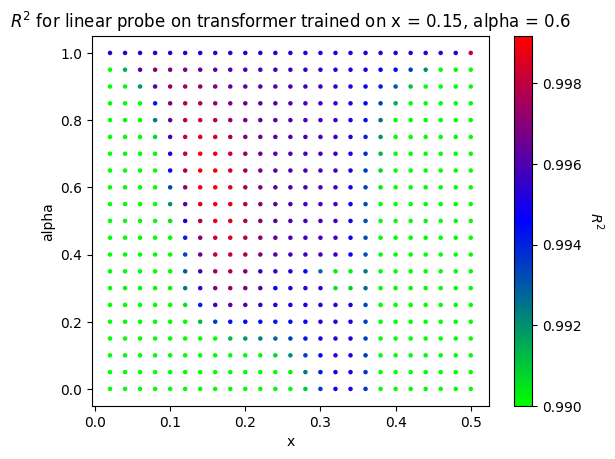

In [133]:
fig, ax = plt.subplots()
colors = ['#00FF00', '#0000FF', '#FF0000']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
scatter = ax.scatter(x_points, a_points, c=r2_for_xa_06, cmap=cmap, s=5, norm=Normalize(vmin=0.99, vmax=r2_for_xa_06.max()))

cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel(r'$R^2$', rotation=-90, va='bottom')
ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_title(r'$R^2$ for linear probe on transformer trained on x = 0.15, alpha = 0.6')

plt.show()

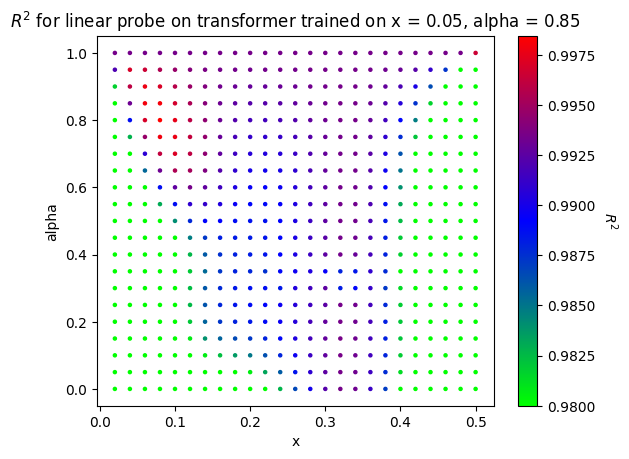

In [132]:
fig, ax = plt.subplots()
colors = ['#00FF00', '#0000FF', '#FF0000']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
scatter = ax.scatter(x_points, a_points, c=r2_for_xa_085, cmap=cmap, s=5, norm=Normalize(vmin=0.98, vmax=r2_for_xa_085.max()))


cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel(r'$R^2$', rotation=-90, va='bottom')
ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_title(r'$R^2$ for linear probe on transformer trained on x = 0.05, alpha = 0.85')

plt.show()